In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

: 

In [ ]:
def prediction_plot(data, title, save = False, save_at='prediction_plot', vmax=None, vmin=None):
    plt.imshow(data, origin = 'lower', vmax=vmax, vmin=vmin, interpolation='none')
    plt.title(title)
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('$LST_0+[min]$')
    clb = plt.colorbar()
    clb.ax.set_title('$[Jy]/\sigma$')
    if save:
        plt.savefig(save_at)
    plt.show()
    plt.close()

In [ ]:
def learning_plot(logs, title, start=0, end=0):
    data = read_csv(logs)

    # converting column data to list
    loss = data['loss'].tolist()[1:]
    val_loss = data['val_loss'].tolist()
    
    if end==0:
        end=len(loss)
    
    plt.plot(val_loss[start:end], label="Validation loss")
    plt.plot(loss[start:end], label="Training loss")
    plt.xlabel('Epoch', fontsize=15)
    plt.ylabel('Learning curve', fontsize=15)
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()
    plt.close()

In [ ]:
def normalize(data):
    mean = np.mean(data)
    std = np.std(data)
    return [(data - mean) / std, mean, std]

def unnormalize(data, mean, std):
    return (data * std) + mean

In [ ]:
def reconstruct(original_data, masked_regions, raw_predictions):
    reconstructed = original_data.copy()
    reconstructed[masked_regions == 1] = raw_predictions[masked_regions == 1]
    return reconstructed

In [ ]:
data = np.load("../outputs/upaint_data_out.npz")
predictions = data["predictions"]
ground_truths = data["ground_truths"]
masks = data["masks"]

In [ ]:
reconstructed = reconstruct(ground_truths[:,:,:,0], masks[:,:,:], predictions[:,:,:,0])

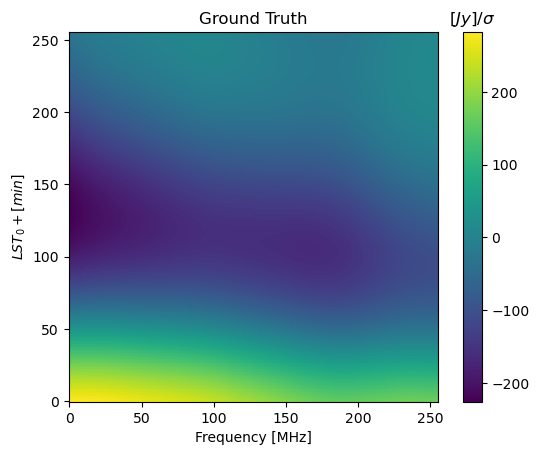

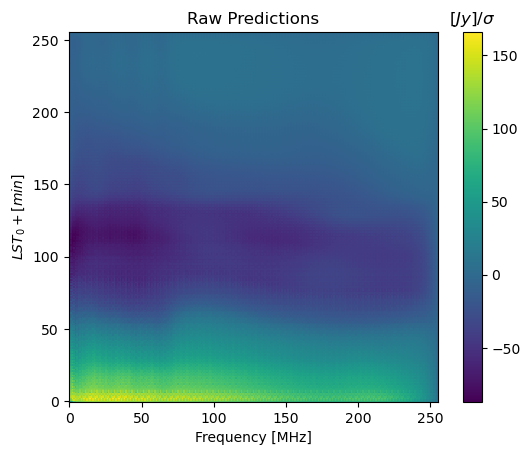

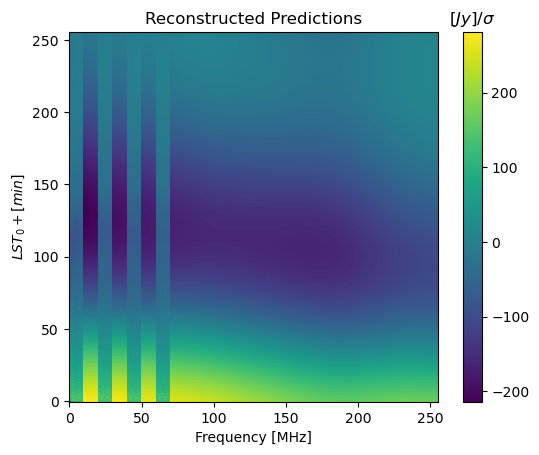

In [ ]:
i = 0

prediction_plot(ground_truths[i,:,:,0], 'Ground Truth')

#prediction_plot(masks[i,:,:], 'Masks')

prediction_plot(predictions[i,:,:,0], 'Raw Predictions')

prediction_plot(reconstructed[i,:,:], 'Reconstructed Predictions')

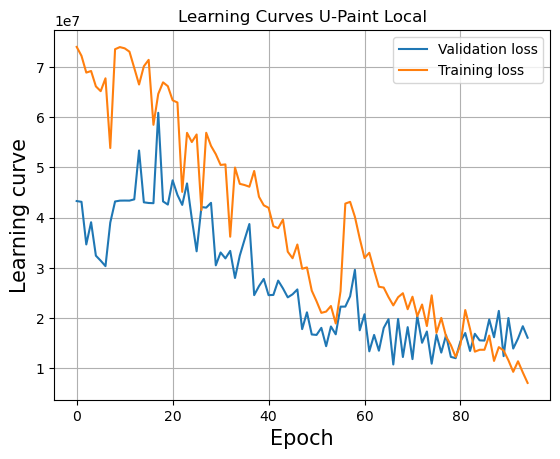

In [ ]:
learning_plot('log_upaint_remote_5.csv', 'Learning Curves U-Paint Local', start=0, end=0)

In [ ]:
data = np.load("../run/upaint_data_out.npz")
predictions = data["predictions"]
ground_truths = data["ground_truths"]
masks = data["masks"]

In [ ]:
reconstructed = reconstruct(ground_truths[:,:,:,0], masks[:,:,:], predictions[:,:,:,0])

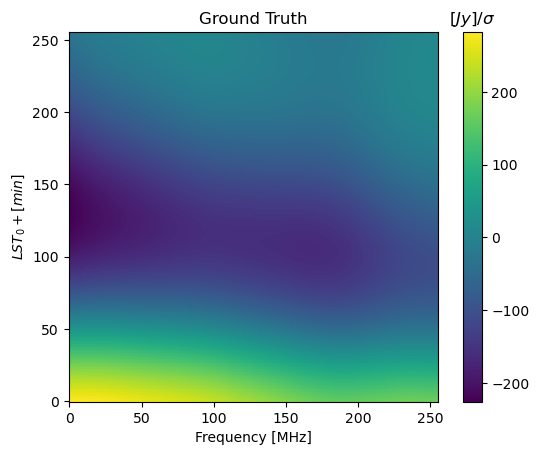

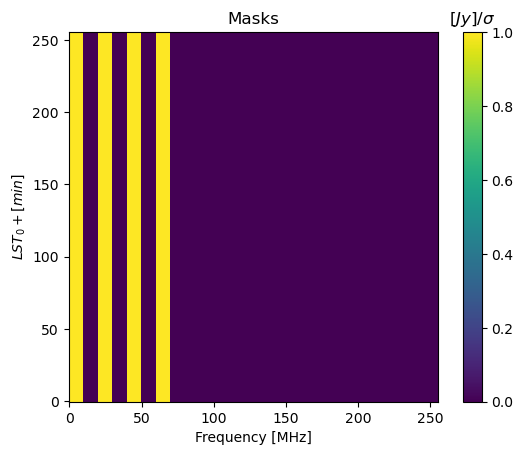

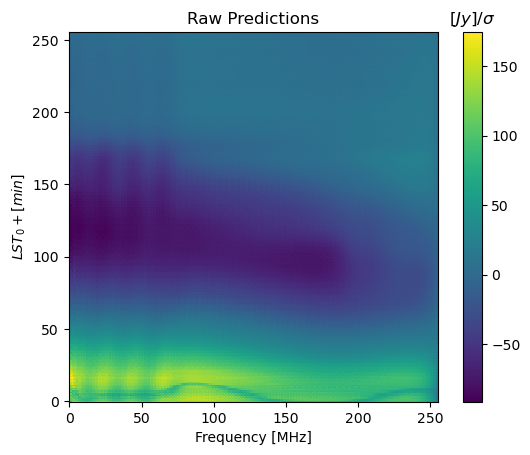

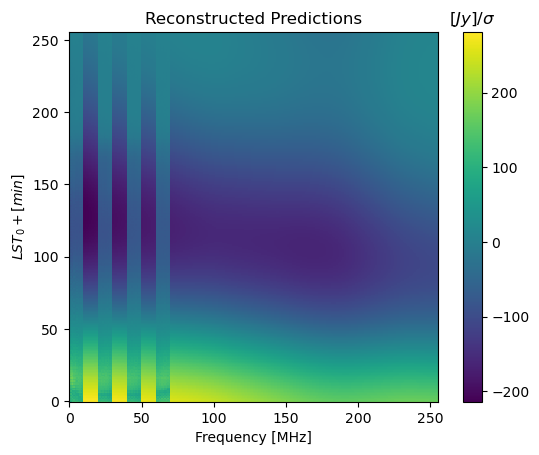

In [ ]:
i = 3

prediction_plot(ground_truths[i,:,:,0], 'Ground Truth')

prediction_plot(masks[i,:,:], 'Masks')

prediction_plot(predictions[i,:,:,0], 'Raw Predictions')

prediction_plot(reconstructed[i,:,:], 'Reconstructed Predictions')

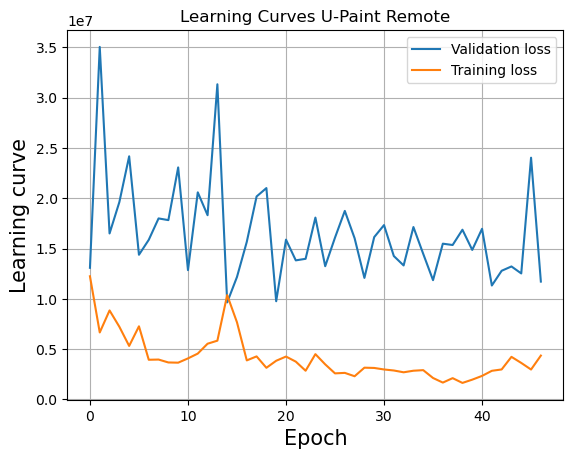

In [ ]:
learning_plot('log_upaint.csv', 'Learning Curves U-Paint Remote', start=0, end=0)